In [1]:
import pandas as pd
from bs4 import BeautifulSoup
    
html_string = '''
      <table>
            <tr>
                <td> Hello! </td>
                <td> Table </td>
            </tr>
        </table>
    '''
    
soup = BeautifulSoup(html_string, 'html.parser') # Parse the HTML as a string
    
table = soup.find_all('table')[0] # Grab the first table會抓所有table，只要第0張
    
new_table = pd.DataFrame(columns=range(0,2), index = [0]) # I know the size #2*1的table
    
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        new_table.iat[row_marker,column_marker] = column.get_text()  #index at 0,0 0,1會定址
        column_marker += 1
    
new_table


,0,1
0,Hello!,Table


In [2]:
import requests
url = "https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015"
response = requests.get(url)
response.text # Access the HTML with the text property

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n    <title>Fantasy Football Leaders Weeks 1 to 17 - QB</title>\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\n    <meta name="description" content="Fantasy Football Leaders Weeks 1 to 17 - QB">\n<link rel="canonical" href="https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015" />\n\n    <meta property="fb:pages" content="184352014941166"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n    <link href=\'https://fonts.googleapis.com/css?family=Open+Sans:200,400,600,700,800|Raleway:200,400,600,700,800\' rel=\'stylesheet\' type=\'text/css\'>\n    <link type="text/css" href="//cdn.fantasypros.com/css/font-awesome.4.6.3.min_bootstrap.3.partial.min.css" rel="stylesheet">\n\n            <link type="text/css" href="//cdn.fantasypros.com/css/style_20180313.css" rel="stylesheet">\n    \n    <link type="text/css" href="//cdn.fantasypros.com/css/dlmenu-custom.min.css" rel="styleshee

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup #幫你抓table
    
class HTMLTableParser:  #全部變成pandas，講義50頁在做的事情
       
    def parse_url(self, url):  #把資料抓回來
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        return [(0,self.parse_html_table(table)) for table in soup.find_all('table')]  
    
    def parse_html_table(self, table):
        n_columns = 0
        n_rows=0
        column_names = []
    
        # Find number of rows and columns
        # we also find the column titles if we can
        for row in table.find_all('tr'):
                
            # Determine the number of rows in the table
            td_tags = row.find_all('td')
            if len(td_tags) > 0:
                n_rows+=1
                if n_columns == 0:
                    # Set the number of columns for our table
                    n_columns = len(td_tags)
                        
            # Handle column names if we find them
            th_tags = row.find_all('th') 
            if len(th_tags) > 0 and len(column_names) == 0:
                for th in th_tags:
                    column_names.append(th.get_text())
    
        # Safeguard on Column Titles
        if len(column_names) > 0 and len(column_names) != n_columns:
            raise Exception("Column titles do not match the number of columns")

        columns = column_names if len(column_names) > 0 else range(0,n_columns)
        df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
        row_marker = 0
        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')
            for column in columns:
                df.iat[row_marker,column_marker] = column.get_text()
                column_marker += 1
            if len(columns) > 0:
                row_marker += 1
                    
        # Convert to float if possible
        for col in df:
            try:
                df[col] = df[col].astype(float)
            except ValueError:
                pass
            
        return df        

In [4]:
url = "https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015"
hp = HTMLTableParser() #class 裡面有兩個方法
table = hp.parse_url(url)[0][1] # Grabbing the table from the tuple 只要抓零個表格的第一張表
table.head()

,Rank,Player,Team,Points,Games,Avg
0,1.0,Cam Newton,CAR,389.1,16.0,24.3
1,2.0,Tom Brady,NE,343.7,16.0,21.5
2,3.0,Russell Wilson,SEA,336.4,16.0,21.0
3,4.0,Blake Bortles,JAC,316.1,16.0,19.8
4,5.0,Carson Palmer,FA,309.2,16.0,19.3


In [ ]:
print(hp.parse_url(url)[0][0]) #index

In [5]:
hp1 = HTMLTableParser()
url1 = "https://www.mobile01.com/topiclist.php?f=346"  #用環圈跑回家再去append，只是要sleep一下。可是python要去用VPN。chrome模擬人的行為
table = hp.parse_url(url1)[0][1]
table.columns

Index(['主題', '回覆', '作者', '最新回應'], dtype='object')

In [6]:
table

,主題,回覆,作者,最新回應
0,【靜態賞車】黑豹加持、魅力加倍！Lexus LC500h Limited... » 23,29.0,2018-03-05 09:17-馬克-,2018-03-15 14:24牛眼魚王
1,渦輪主力戰將 Lexus NX300 豪華版試駕 » 23,20.0,2018-03-02 09:32艾咪,2018-03-11 23:15GuanYu912
2,LEXUS NX 200 152&ES200 181菜單,0.0,2018-03-21 18:42赤血魂,2018-03-21 18:42赤血魂
3,2018 NX200 最新菜單 »...1314151617,160.0,2017-12-26 16:53chris0720,2018-03-21 18:31赤血魂
4,[TODD] 朝思暮想的開箱 - LEXUS ES200 »...7891011,104.0,2018-02-04 14:11jake44430397,2018-03-21 17:05IORI-八神庵
5,求北區RX300 豪華版 菜單,8.0,2018-01-22 16:25kven0818,2018-03-21 16:12發福阿伯
6,請報RX300(18/18)豪華版的價格 »...56789,87.0,2018-01-08 00:12jct1213,2018-03-21 16:11發福阿伯
7,CT200h:你們都猜錯了 I will be back !... » 234,34.0,2018-03-19 12:33rebel_buns,2018-03-21 14:37魔鬼的步伐
8,沒有ACC主動煞停ES值得買嗎? »...34567,65.0,2018-01-09 12:42台北小林N,2018-03-21 13:42ramsagouf
9,請問2018年款NX200的菜單 »...2829303132,313.0,2017-10-11 20:18inpunky1129,2018-03-21 11:16NICK501


Text(0.5,1,'Average QB Points Per Game in 2015')

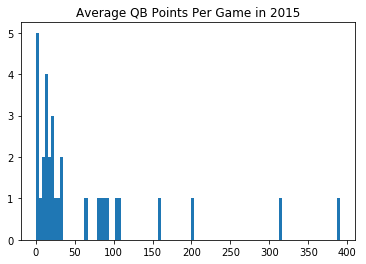

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
    
plt.figure()
avg=table['回覆'].values
plt.hist(avg, bins = 100)
plt.title('Average QB Points Per Game in 2015')
